In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
import ast  # Library for handling literal_eval
from geopy.distance import geodesic


df = pd.read_csv('merged.csv')
# columns = ['maincategory', 'longitude', 'latitude', 'starttime', 'duration', 'subCategoryA', 'attendinggroups', 'closuretype', 'mainstreet']
# df = df[columns]
# df = df[df['maincategory']=='Crash']
df=df.dropna()
# Print the column names to verify
print(df.columns)

quantile_001 = df['duration'].quantile(0.01)
quantile_099 = df['duration'].quantile(0.99)
df = df[(df['duration'] >= quantile_001) & (df['duration'] <= quantile_099)]

Index(['Main_Category', 'Longitude', 'Latitude', 'Day', 'duration',
       'Primary_Vehicle', 'Secondary_Vehicle', 'Is_Major_Incident', 'Advice_A',
       'Advice_B', 'Closure_Type', 'Direction', 'Main_Street',
       'Affected_Lanes', 'Actual_Number_of_Lanes ', 'Suburb', 'Traffic_Volume',
       'SA2_CODE21', 'SA3_CODE21', 'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21',
       'AREASQKM21', '0_ZID', '1_Area', '2_ML', '3_TRL', '4_PRL', '5_SRL',
       '6_TrRL', '7_RRL', '8_LsRL', '9_URL', '10_ToRL', '11_EoR', '12_NoN',
       '13_NDEs', '14_NNC2L', '15_NNC3L', '16_NNC4L', '17_AND', '18_NE',
       '19_MCI', '20_CoI', '21 NBS', '22_CA', '23_EA', '24_HA', '25_IA',
       '26_OA', '27_PA', '28_PrA', '29_RA', '30_TA', '31_WbA', '32_EoLU',
       '33_TP', '34_PD0MV', '35_PD1MV', '36_PD2MV', '37_PD3MV', '38_PD≥4MV',
       '39_PUE', '40_AMI', '41_NPTtWbyPT', '42_NPTtWbyTx', '43_NPTtWbyCD',
       '44_NPTtWbyCP', '45_NPTtWbyO', '46_NPWfH', '47_PWCJH', '48_PBCJH',
       '49_ANP_FH', 'RMS', 'Motorwa

In [2]:
df

,Main_Category,Longitude,Latitude,Day,duration,Primary_Vehicle,Secondary_Vehicle,Is_Major_Incident,Advice_A,Advice_B,...,Motorway crew,Emergency services,Transport for NSW,Tow truck,Heavy vehicle tow truck,Incident_Type,Num_Vehicles_Involved,Month,Hour,distance_to_CBD
0,1,151.058,-33.9431,5,39.319950,1,2,0,10,0,...,0,1,0,0,0,0,2,8,19,15.781064
1,0,151.159,-33.8096,6,12.029000,1,9,0,10,134,...,0,0,0,0,0,1,1,8,0,8.323913
2,1,150.875,-33.7344,6,16.956667,1,9,0,26,134,...,0,1,0,0,0,0,1,8,1,34.354983
3,1,150.973,-33.8172,6,42.804117,5,2,0,10,0,...,0,1,1,0,0,0,1,8,1,22.500677
4,1,150.981,-33.7919,6,40.840000,3,4,0,10,134,...,0,0,0,0,0,0,3,8,1,22.753003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85592,0,151.070,-33.8579,1,0.782333,5,8,0,18,37,...,0,0,0,0,0,1,1,7,1,12.758398
85593,0,151.159,-33.6148,1,0.912617,1,8,0,18,37,...,0,0,0,0,0,1,1,7,4,29.004167
85597,0,151.211,-33.8435,4,0.908167,1,8,0,10,0,...,0,0,0,1,0,1,1,7,4,3.323727
85598,0,151.192,-33.5559,0,0.826567,1,8,0,10,134,...,0,0,0,0,0,1,1,7,8,35.225187


Script started...
Starting model training and evaluation...
Training model: XGBoost
RMSE for XGBoost: 34.298707394522104
Training model: LightGBM
RMSE for LightGBM: 34.06437805956336
Training model: Random Forest
RMSE for Random Forest: 34.97513829564887
Training model: Extra Trees
RMSE for Extra Trees: 35.12159619868488
Training model: Decision Tree
RMSE for Decision Tree: 48.2769179348073
Training model: KNN
RMSE for KNN: 36.61621028384087
Training model: MLP-ANN


C:\Python3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE for MLP-ANN: 37.12117482523833
Plotting model performance...
Model performance plot saved as 'model_performance_rmse_only.pdf'.
Feature importances for XGBoost:
Feature: Mechanic, Importance: 0.014999999664723873
Feature: Emergency services, Importance: 0.01600000075995922
Feature: Motorway Crew, Importance: 0.01899999938905239
Feature: 29_RA, Importance: 0.024000000208616257
Feature: Primary_Vehicle, Importance: 0.028999999165534973
Feature: Secondary_Vehicle, Importance: 0.035999998450279236
Feature: Heavy vehicle tow truck, Importance: 0.03999999910593033
Feature: Traffic_Volume, Importance: 0.04399999976158142
Feature: 38_PD≥4MV, Importance: 0.04399999976158142
Feature: 2_ML, Importance: 0.04899999871850014
Feature: Is_Major_Incident, Importance: 0.061000000685453415
Feature: Affected_Lanes, Importance: 0.0729999989271164
Top 12 feature importance plot saved as 'top_12_feature_importance_xgboost.pdf'.
Feature importances for LightGBM:
Feature: Actual_Number_of_Lanes , Importan

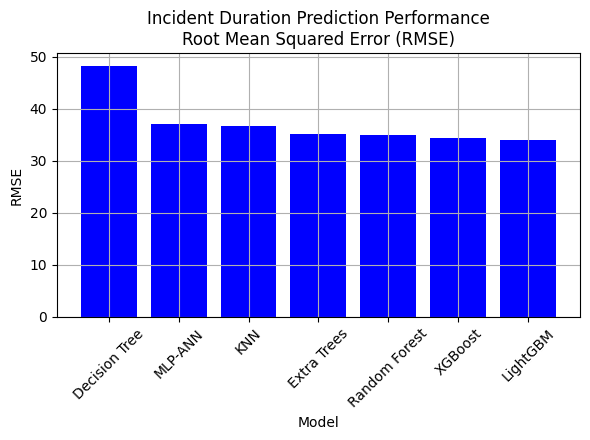

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb


def train_models_and_plot(names, models, X_train, X_test, y_train, y_test):
    print("Starting model training and evaluation...")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    performance = []
    for name, model in zip(names, models):
        print(f"Training model: {name}")
        model.fit(X_train, y_train)
        y_pred_log = model.predict(X_test)
        y_pred = np.expm1(y_pred_log)  # Reverting the log-transformed predictions
        rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))  # Revert log-transformed y_test

        print(f"RMSE for {name}: {rmse}")

        performance.append((name, rmse))

    perf_df = pd.DataFrame(performance, columns=['Model', 'RMSE'])

    # Sort DataFrame by RMSE values in descending order
    perf_df = perf_df.sort_values(by='RMSE', ascending=False)

    print("Plotting model performance...")

    # Adjusting the figure size to make it smaller
    plt.figure(figsize=(6, 4.5))
    plt.bar(perf_df['Model'], perf_df['RMSE'], color='blue')

    # Rotate model names by 45 degrees
    plt.xticks(rotation=45)

    plt.title('Incident Duration Prediction Performance\nRoot Mean Squared Error (RMSE)')
    plt.ylabel('RMSE')
    plt.xlabel('Model')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('model_performance_rmse_only.pdf')
    print("Model performance plot saved as 'model_performance_rmse_only.pdf'.")


def plot_feature_importance(model, X, model_name):
    """
    Plot and save the feature importances of the given model, focusing on the top 12 features.
    Also print feature names and importance to the console.

    Args:
    - model: The trained model object.
    - X (DataFrame): The feature dataset.
    - model_name (str): The name of the model, used for titling and naming the output file.
    """
    if hasattr(model, "feature_importances_"):
        print(f"Feature importances for {model_name}:")
        importances = model.feature_importances_
        indices = np.argsort(importances)[-12:]  # Get indices of top 12 features

        # Print feature names and importances
        for i in indices:
            print(f"Feature: {X.columns[i]}, Importance: {np.round(importances[i],3)}")

        # Adjust the plotting to focus on these top 12 features
        plt.figure(figsize=(6, 5))  # Adjusted figure size for 12 features
        plt.title(f"Top 12 Feature Importances for {model_name}")

        # Plot the feature importances
        plt.bar(range(12), importances[indices], color="r", align="center")

        # Use the indices to map back to feature names
        plt.xticks(range(12), X.columns[indices], rotation=45, ha="right")

        # Add x-limit to focus on the top 12 features
        plt.xlim([-1, 12])

        # Add y-label for relative feature importance
        plt.ylabel("Relative Feature Importance")

        # Add grid for clarity
        plt.grid()

        # Adjust layout and save the plot
        plt.tight_layout()
        filename = f'top_12_feature_importance_{model_name.replace(" ", "_").lower()}.pdf'
        plt.savefig(filename)
        print(f"Top 12 feature importance plot saved as '{filename}'.")
        plt.close()  # Close the plot to free memory and avoid overlap in subsequent plots
    else:
        print(f"Model {model_name} does not support feature importances.")


def main():
    print("Script started...")

    names = ["XGBoost", "LightGBM", "Random Forest", "Extra Trees", "Decision Tree", "KNN", "MLP-ANN"]
    models = [
        xgb.XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1),
        lgb.LGBMRegressor(n_estimators=200, random_state=42, n_jobs=-1),
        RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42),
        ExtraTreesRegressor(n_estimators=200, n_jobs=-1, random_state=42),
        DecisionTreeRegressor(random_state=42),
        KNeighborsRegressor(n_neighbors=5),  # KNN model
        MLPRegressor(hidden_layer_sizes=(200,), max_iter=200, random_state=42)  # MLP-ANN model
    ]

    # Replace this with your actual data loading logic
    # Example DataFrame creation
    np.random.seed(42)
    # Assuming df is already loaded, with 'duration' as the target variable
    # Applying log1p transformation to the target variable 'duration'
    df['duration'] = np.log1p(df['duration'])

    X = df.drop(['duration'], axis=1)
    y = df['duration']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_models_and_plot(names, models, X_train, X_test, y_train, y_test)

    # Plot feature importances for each model that supports it
    for model, name in zip(models, names):
        plot_feature_importance(model, X, name)

    print("Script completed successfully.")


if __name__ == '__main__':
    main()


In [30]:
# df=df.dropna()

Script started...
Starting model training and evaluation...
Training model: XGBoost
RMSE for XGBoost: 34.298707394522104
Training model: LightGBM
RMSE for LightGBM: 34.06437805956336
Training model: Random Forest
RMSE for Random Forest: 34.97513829564887
Training model: Extra Trees
RMSE for Extra Trees: 35.12159619868488
Training model: Decision Tree
RMSE for Decision Tree: 48.2769179348073
Training model: KNN
RMSE for KNN: 36.61621028384087
Training model: MLP-ANN


C:\Python3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE for MLP-ANN: 37.12117482523833
Plotting model performance...
Model performance plot saved as 'model_performance_rmse_only.pdf'.
Plotting top 12 feature importances for XGBoost...
Top 12 feature importance plot saved as 'top_12_feature_importance_xgboost.pdf'.
Plotting top 12 feature importances for LightGBM...
Top 12 feature importance plot saved as 'top_12_feature_importance_lightgbm.pdf'.
Plotting top 12 feature importances for Random Forest...
Top 12 feature importance plot saved as 'top_12_feature_importance_random_forest.pdf'.
Plotting top 12 feature importances for Extra Trees...
Top 12 feature importance plot saved as 'top_12_feature_importance_extra_trees.pdf'.
Plotting top 12 feature importances for Decision Tree...
Top 12 feature importance plot saved as 'top_12_feature_importance_decision_tree.pdf'.
Model KNN does not support feature importances.
Model MLP-ANN does not support feature importances.
Script completed successfully.


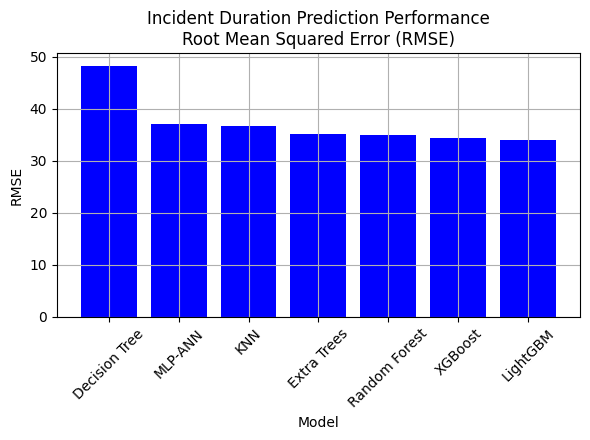

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb


def train_models_and_plot(names, models, X_train, X_test, y_train, y_test):
    print("Starting model training and evaluation...")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    performance = []
    for name, model in zip(names, models):
        print(f"Training model: {name}")
        model.fit(X_train, y_train)
        y_pred_log = model.predict(X_test)
        y_pred = np.expm1(y_pred_log)  # Reverting the log-transformed predictions
        rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))  # Revert log-transformed y_test

        print(f"RMSE for {name}: {rmse}")

        performance.append((name, rmse))

    perf_df = pd.DataFrame(performance, columns=['Model', 'RMSE'])

    # Sort DataFrame by RMSE values in descending order
    perf_df = perf_df.sort_values(by='RMSE', ascending=False)

    print("Plotting model performance...")

    # Adjusting the figure size to make it smaller
    plt.figure(figsize=(6, 4.5))
    plt.bar(perf_df['Model'], perf_df['RMSE'], color='blue')

    # Rotate model names by 45 degrees
    plt.xticks(rotation=45)

    plt.title('Incident Duration Prediction Performance\nRoot Mean Squared Error (RMSE)')
    plt.ylabel('RMSE')
    plt.xlabel('Model')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('model_performance_rmse_only.pdf')
    print("Model performance plot saved as 'model_performance_rmse_only.pdf'.")


def plot_feature_importance(model, X, model_name):
    """
    Plot and save the feature importances of the given model, focusing on the top 12 features.

    Args:
    - model: The trained model object.
    - X (DataFrame): The feature dataset.
    - model_name (str): The name of the model, used for titling and naming the output file.
    """
    if hasattr(model, "feature_importances_"):
        print(f"Plotting top 12 feature importances for {model_name}...")
        importances = model.feature_importances_
        indices = np.argsort(importances)[-12:]  # Get indices of top 12 features

        # Adjust the plotting to focus on these top 12 features
        plt.figure(figsize=(6, 5))  # Adjusted figure size for 12 features
        plt.title(f"Top 12 Feature Importances for {model_name}")

        # Plot the feature importances
        plt.bar(range(12), importances[indices], color="r", align="center")

        # Use the indices to map back to feature names
        plt.xticks(range(12), X.columns[indices], rotation=45, ha="right")

        # Add x-limit to focus on the top 12 features
        plt.xlim([-1, 12])

        # Add y-label for relative feature importance
        plt.ylabel("Relative Feature Importance")

        # Add grid for clarity
        plt.grid()

        # Adjust layout and save the plot
        plt.tight_layout()
        filename = f'top_12_feature_importance_{model_name.replace(" ", "_").lower()}.pdf'
        plt.savefig(filename)
        print(f"Top 12 feature importance plot saved as '{filename}'.")
        plt.close()  # Close the plot to free memory and avoid overlap in subsequent plots
    else:
        print(f"Model {model_name} does not support feature importances.")


def main():
    print("Script started...")

    names = ["XGBoost", "LightGBM", "Random Forest", "Extra Trees", "Decision Tree", "KNN", "MLP-ANN"]
    models = [
        xgb.XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1),
        lgb.LGBMRegressor(n_estimators=200, random_state=42, n_jobs=-1),
        RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42),
        ExtraTreesRegressor(n_estimators=200, n_jobs=-1, random_state=42),
        DecisionTreeRegressor(random_state=42),
        KNeighborsRegressor(n_neighbors=5),  # KNN model
        MLPRegressor(hidden_layer_sizes=(200,), max_iter=200, random_state=42)  # MLP-ANN model
    ]

    # Replace this with your actual data loading logic
    # Example DataFrame creation
    np.random.seed(42)
    # Assuming df is already loaded, with 'duration' as the target variable
    # Applying log1p transformation to the target variable 'duration'
    df['duration'] = np.log1p(df['duration'])

    X = df.drop(['duration'], axis=1)
    y = df['duration']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_models_and_plot(names, models, X_train, X_test, y_train, y_test)

    # Plot feature importances for each model that supports it
    for model, name in zip(models, names):
        plot_feature_importance(model, X, name)

    print("Script completed successfully.")


if __name__ == '__main__':
    main()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb


def train_models_and_plot(names, models, X_train, X_test, y_train, y_test):
    print("Starting model training and evaluation...")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    performance = []
    for name, model in zip(names, models):
        print(f"Training model: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print(f"RMSE for {name}: {rmse}")
        
        performance.append((name, rmse))
    
    perf_df = pd.DataFrame(performance, columns=['Model', 'RMSE'])
    
    # Sort DataFrame by RMSE values in descending order
    perf_df = perf_df.sort_values(by='RMSE', ascending=False)
    
    print("Plotting model performance...")
    
    # Adjusting the figure size to make it smaller
    plt.figure(figsize=(6, 4.5))  
    plt.bar(perf_df['Model'], perf_df['RMSE'], color='blue')
    
    # Rotate model names by 45 degrees
    plt.xticks(rotation=45)
    
    plt.title('Incident Duration Prediction Performance\nRoot Mean Squared Error (RMSE)')
    plt.ylabel('RMSE')
    plt.xlabel('Model')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('model_performance_rmse_only.pdf')
    print("Model performance plot saved as 'model_performance_rmse_only.pdf'.")


def plot_feature_importance(model, X, model_name):
    """
    Plot and save the feature importances of the given model, focusing on the top 12 features.

    Args:
    - model: The trained model object.
    - X (DataFrame): The feature dataset.
    - model_name (str): The name of the model, used for titling and naming the output file.
    """
    if hasattr(model, "feature_importances_"):
        print(f"Plotting top 12 feature importances for {model_name}...")
        importances = model.feature_importances_
        indices = np.argsort(importances)[-12:]  # Get indices of top 12 features
        
        # Adjust the plotting to focus on these top 12 features
        plt.figure(figsize=(6, 5))  # Adjusted figure size for 12 features
        plt.title(f"Top 12 Feature Importances for {model_name}")
        
        # Plot the feature importances
        plt.bar(range(12), importances[indices], color="r", align="center")
        
        # Use the indices to map back to feature names
        plt.xticks(range(12), X.columns[indices], rotation=45, ha="right")
        
        # Add x-limit to focus on the top 12 features
        plt.xlim([-1, 12])
        
        # Add y-label for relative feature importance
        plt.ylabel("Relative Feature Importance")
        
        # Add grid for clarity
        plt.grid()
        
        # Adjust layout and save the plot
        plt.tight_layout()
        filename = f'top_12_feature_importance_{model_name.replace(" ", "_").lower()}.pdf'
        plt.savefig(filename)
        print(f"Top 12 feature importance plot saved as '{filename}'.")
        plt.close()  # Close the plot to free memory and avoid overlap in subsequent plots
    else:
        print(f"Model {model_name} does not support feature importances.")



def main():
    print("Script started...")
    
    names = ["XGBoost", "LightGBM", "Random Forest", "Extra Trees", "Decision Tree", "KNN", "MLP-ANN"]
    models = [
        xgb.XGBRegressor(n_estimators=200, objective='reg:squarederror',n_jobs=-1),
        lgb.LGBMRegressor(n_estimators=200, random_state=42,n_jobs=-1),
        RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42),
        ExtraTreesRegressor(n_estimators=200, n_jobs=-1, random_state=42),
        DecisionTreeRegressor(random_state=42),
        KNeighborsRegressor(n_neighbors=5),  # KNN model
        MLPRegressor(hidden_layer_sizes=(200,), max_iter=200, random_state=42)  # MLP-ANN model
    ]

    # Replace this with your actual data loading logic
    # Example DataFrame creation
    np.random.seed(42)
#     df = pd.DataFrame(np.random.rand(1000, 10), columns=[f'Feature{i+1}' for i in range(10)])
#     df['duration'] = np.random.rand(1000) * 100  # Synthetic target variable

    X = df.drop(['duration'], axis=1)
    y = df['duration']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    train_models_and_plot(names, models, X_train, X_test, y_train, y_test)
    
    # Plot feature importances for each model that supports it
    for model, name in zip(models, names):
        plot_feature_importance(model, X, name)
    
    print("Script completed successfully.")


if __name__ == '__main__':
    main()


Script started...
Starting model training and evaluation...
Training model: XGBoost
RMSE for XGBoost: 33.55690654832966
Training model: LightGBM
RMSE for LightGBM: 32.722226800558396
Training model: Random Forest
RMSE for Random Forest: 33.86305016004932
Training model: Extra Trees
RMSE for Extra Trees: 34.37448062482291
Training model: Decision Tree
RMSE for Decision Tree: 48.14656599855452
Training model: KNN
RMSE for KNN: 36.42790416900746
Training model: MLP-ANN


C:\Python3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


RMSE for MLP-ANN: 33.29220865598863
Plotting model performance...



KeyboardInterrupt



Error in callback <function flush_figures at 0x00000293BC110550> (for post_execute):


KeyboardInterrupt: 